In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [44]:
supplies = pd.read_csv("office_supplies.csv")
supplies.head()
            

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.94,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.76,7,0.0,NaN
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.90,2,0.0,NaN
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.84,3,0.0,NaN
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.82,2,0.0,NaN


In [4]:
supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   object 
 2   Ship Mode     9993 non-null   object 
 3   Region        9993 non-null   object 
 4   Product ID    9993 non-null   object 
 5   Category      9993 non-null   object 
 6   Sub-Category  9993 non-null   object 
 7   Product Name  9993 non-null   object 
 8   Sales         9993 non-null   float64
 9   Quantity      9993 non-null   int64  
 10  Discount      9993 non-null   float64
 11  Profit        8000 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.0+ KB


In [5]:
supplies.columns

Index(['Order ID', 'Order Date', 'Ship Mode', 'Region', 'Product ID',
       'Category', 'Sub-Category', 'Product Name', 'Sales', 'Quantity',
       'Discount', 'Profit'],
      dtype='object')

The office supplies data frame has 9993 rows but the profit column has only 8000 rows with 19993 rows missing and some with '...' so we will check the Profit column and replace all lost values with 0

In [6]:
#checking for null values in Profit
supplies.Profit.unique()

array([     nan,  41.9136, 219.582 , ...,  20.9148,   3.8976,  19.0344])

In [7]:
#replacing null values with zero
Supplies= supplies.fillna(0)

In [8]:
#replacing non-recorded values with zero
Supplies= Supplies.replace('...',0)

In [9]:
#checking if replacement has been done
Supplies.Profit.unique()

array([  0.    ,  41.9136, 219.582 , ...,  20.9148,   3.8976,  19.0344])

In [10]:
Supplies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   object 
 2   Ship Mode     9993 non-null   object 
 3   Region        9993 non-null   object 
 4   Product ID    9993 non-null   object 
 5   Category      9993 non-null   object 
 6   Sub-Category  9993 non-null   object 
 7   Product Name  9993 non-null   object 
 8   Sales         9993 non-null   float64
 9   Quantity      9993 non-null   int64  
 10  Discount      9993 non-null   float64
 11  Profit        9993 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.0+ KB


The '-' in the Sub-category has to be removed to prevent an error

In [11]:
# Renaming Sub-category and removing spaces between columns
Supplies.columns = ['OrderID', 'OrderDate', 'ShipMode', 'Region', 'ProductID',
       'Category', 'SubCategory', 'ProductName', 'Sales', 'Quantity',
       'Discount', 'Profit']

In [15]:
#checking if replacement has been done
Supplies.columns

Index(['OrderID', 'OrderDate', 'ShipMode', 'Region', 'ProductID', 'Category',
       'SubCategory', 'ProductName', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

Now that we have the data cleaned, we can go on with the data analysis

# UNIVARIATE ANALYSIS

# Profit Analysis

In [18]:
Supplies.Profit.describe()

count    9993.000000
mean       22.523152
std       203.708204
min     -6599.978000
25%         0.000000
50%         4.884000
75%        21.098000
max      8399.976000
Name: Profit, dtype: float64

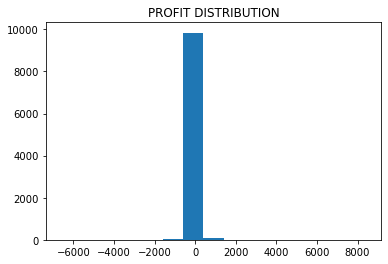

In [19]:
plt.hist(Supplies['Profit'], bins = 15)
plt.title('PROFIT DISTRIBUTION', size =12)
plt.show()

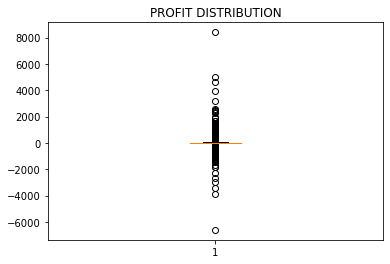

In [20]:
plt.boxplot(Supplies['Profit'])
plt.title('PROFIT DISTRIBUTION', size =12)
plt.show()

From the distribution, 50% of the profit  is 4.884 cedis. the remaining half of it fell between 4.884 and 8399.976. For 50% of the profit to be 4.884 of products of 9993, it means less profits were being generated.

# Sales Analysis

In [21]:
Supplies.Sales.describe()

count     9993.000000
mean       229.854588
std        623.276194
min          0.444000
25%         17.280000
50%         54.480000
75%        209.940000
max      22638.480000
Name: Sales, dtype: float64

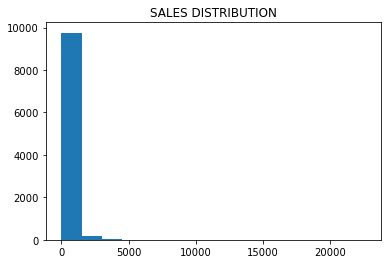

In [22]:
plt.hist(Supplies['Sales'], bins = 15)
plt.title('SALES DISTRIBUTION', size =12)
plt.show()

From the sales distribution, we can see that 50% of the sales made was 54.48 cedis and the maximum sales made was 22,638.48 cedis. which considering the total number of products, is quite low. We can say the company wasn't making enough sales.

In [23]:
Supplies.Quantity.describe()

count    9993.000000
mean        3.789553
std         2.225220
min         1.000000
25%         2.000000
50%         3.000000
75%         5.000000
max        14.000000
Name: Quantity, dtype: float64

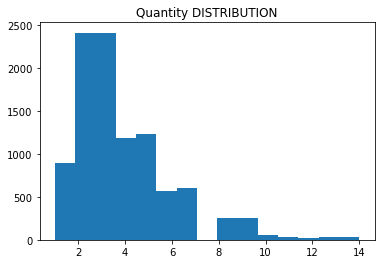

In [24]:
plt.hist(Supplies['Quantity'], bins = 15)
plt.title('Quantity DISTRIBUTION', size =12)
plt.show()

From the quatity distribution, the maximum quantity ordered was 14 products which again looking at the total number of products, was quite low. 

# MULTIVARIATE ANALYSIS

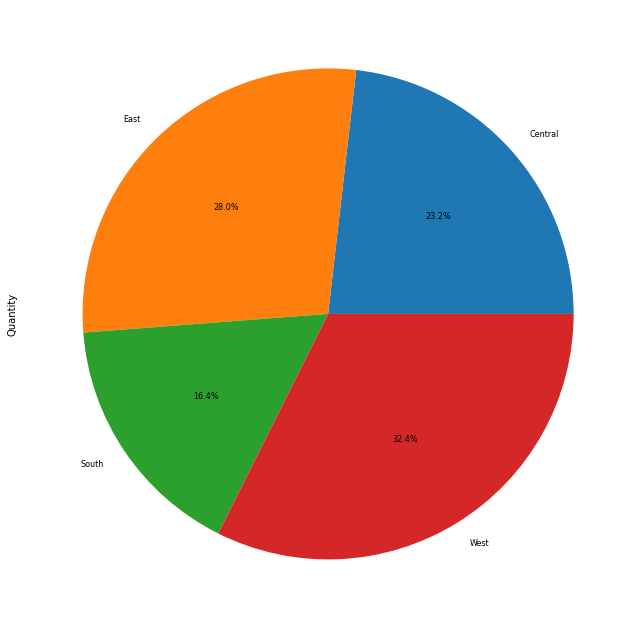

In [28]:
Supplies.groupby('Region')['Quantity'].sum().plot(kind= 'pie', figsize =(11,15), fontsize = 8, autopct= '%1.1f%%')
plt.show()

From the distribution, we can see the West had the highest quantity of the products ordered whilst the South had the lowest quantity of products ordered.

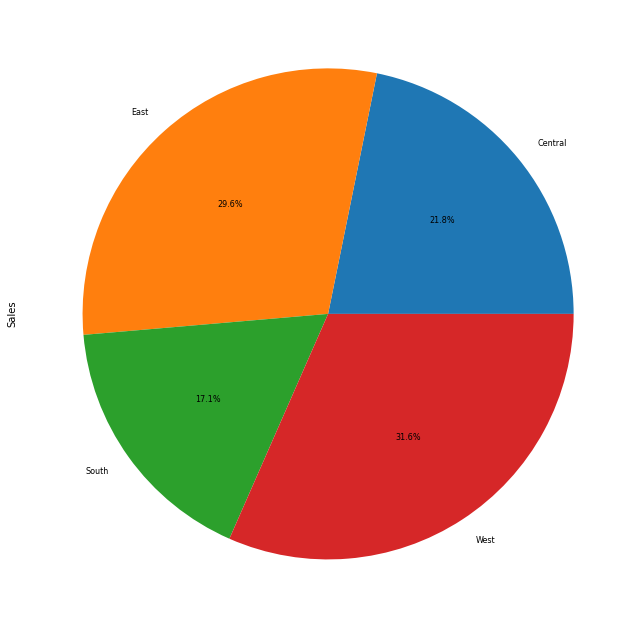

In [35]:
Supplies.groupby('Region')['Sales'].sum().plot(kind= 'pie', figsize =(11,15), fontsize = 8, autopct= '%1.1f%%')
plt.show()

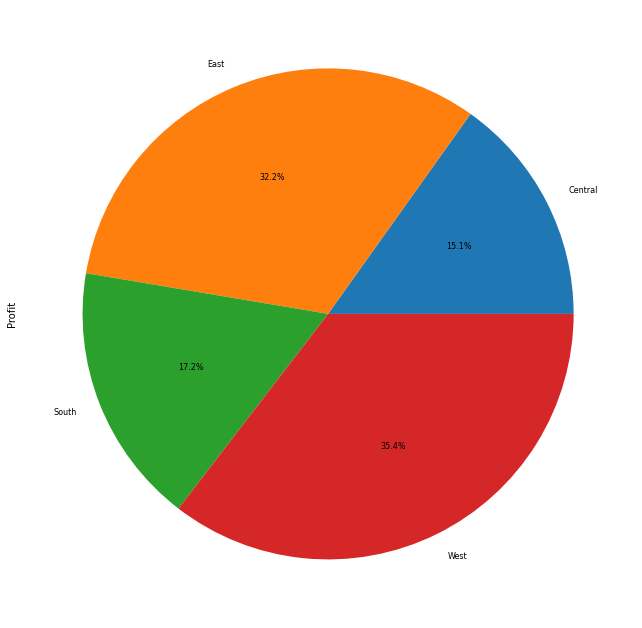

In [34]:
Supplies.groupby('Region')['Profit'].sum().plot(kind= 'pie', figsize =(11,15), fontsize = 8, autopct= '%1.1f%%')
plt.show()

The most profit was generated from the West considering it was the region with the highest orders.



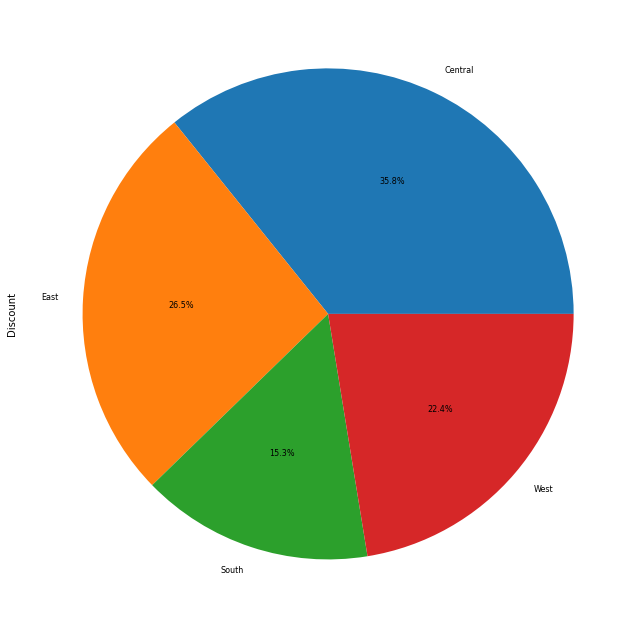

In [50]:
Supplies.groupby('Region')['Discount'].sum().plot(kind= 'pie', figsize =(11,15), fontsize = 8, autopct= '%1.1f%%')
plt.show()

Discounts were given more to those in the Central Region than those in the other regions.

In [39]:
Supplies.groupby(['Region'])[['ProductName','Quantity']].max()

,ProductName,Quantity
Region,,
Central,netTALK DUO VoIP Telephone Service,14
East,netTALK DUO VoIP Telephone Service,14
South,iOttie XL Car Mount,14
West,netTALK DUO VoIP Telephone Service,14


we can see that Telephone Service was popular in the CENTRAL,EAST and WEST parts and iottie XL car mount was popular in the South

In [40]:
Supplies.groupby(['Region'])[['ProductName','Quantity']].min()

,ProductName,Quantity
Region,,
Central,"""While you Were Out"" Message Book, One Form pe...",1
East,"#10 Gummed Flap White Envelopes, 100/Box",1
South,"""While you Were Out"" Message Book, One Form pe...",1
West,"""While you Were Out"" Message Book, One Form pe...",1


We can also see that "While you were out" Message book was the least popular product in the CENTRAL, SOUTH AND WEST part and #10 Gummed Flap white envelopes were the least popular in the East

In [45]:
#finding the region with the maximum sale
Supplies.groupby(['Region'])[['ProductName','Sales']].max()

,ProductName,Sales
Region,,
Central,netTALK DUO VoIP Telephone Service,17499.950
East,netTALK DUO VoIP Telephone Service,11199.968
South,iOttie XL Car Mount,22638.480
West,netTALK DUO VoIP Telephone Service,13999.960


In [46]:
#finding the region with the lowest sale
Supplies.groupby(['Region'])[['ProductName','Sales']].min()

,ProductName,Sales
Region,,
Central,"""While you Were Out"" Message Book, One Form pe...",0.444
East,"#10 Gummed Flap White Envelopes, 100/Box",0.852
South,"""While you Were Out"" Message Book, One Form pe...",1.167
West,"""While you Were Out"" Message Book, One Form pe...",0.990


 As stated above, these products were not just popular in these Regions they were also the most sold in these regions. Also, the least poppular products were also the least sold products in the regions

In [48]:
#finding the region with the popular product
Supplies.groupby(['Region'])[['Category','Quantity']].max()

,Category,Quantity
Region,,
Central,Technology,14
East,Technology,14
South,Technology,14
West,Technology,14


In [49]:
#finding the region with the least popular products
Supplies.groupby(['Region'])[['Category','Quantity']].min()

,Category,Quantity
Region,,
Central,Furniture,1
East,Furniture,1
South,Furniture,1
West,Furniture,1


Looking at the categories, we can see that Technological products were  the most sold in all the regions whilst Furniture were the least sold in all the regions

In [55]:
 Supplies.corr()

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200794,-0.028187,0.369184
Quantity,0.200794,1.000000,0.008630,0.056094
Discount,-0.028187,0.008630,1.000000,-0.203648
Profit,0.369184,0.056094,-0.203648,1.000000


The correlation between the columns are fairly positive except between sales and discount and profit and discount which are weak negatives.

*Looking at the analysis of the data, we can see that the maximum quantity per order was quite low making the sales and the profits also low. The percentages of sales and profit of the region with the highest orders were 31.6% and 35.4% respectively which are quite low. To entice the Regions with low patronage to buy more, i think they should be given more discount to encourage them to buy more as discounts in these regions were not that high*  